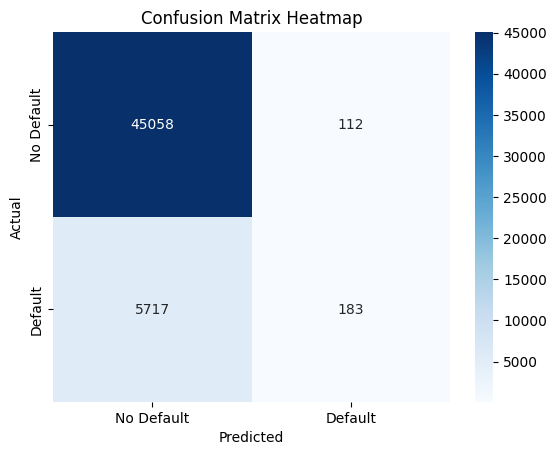

Classification Report:
              precision    recall  f1-score   support

  No Default       0.89      1.00      0.94     45170
     Default       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Step 1: Load dataset
df = pd.read_csv("1. Predict Loan Default.csv")

# Step 2: Drop LoanID column if present
if 'LoanID' in df.columns:
    df.drop(columns=['LoanID'], inplace=True)

# Step 3: Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Split data into features and target
X = df.drop(columns=['Default'])
y = df['Default']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 8: Predict
y_pred = model.predict(X_test_scaled)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10: Plot Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step 11: Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Default", "Default"]))
